<img src="https://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Risk Parity & Budgeting with Python

### EOD Financial Data

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

http://tpq.io | [@dyjh](http://twitter.com/dyjh) | [team@tpq.io](mailto:team@tpq.io)

# EOD Historical Data

See [company page](https://eodhistoricaldata.com/r/?ref=X8R79ISB).

## Imports 

Installation of the `eod` package via

    pip install eod

In [1]:
import numpy as np
import pandas as pd
# from eod import EodHistoricalData

In [2]:
from pylab import plt
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'svg'

## API Connection

In [ ]:
%run ../creds.py

In [ ]:
api = EodHistoricalData(api_key)

## Investment Universum

In [ ]:
sym = [
    'AAPL.US',     # Apple Inc. Stock
    # 'AMZN.US',     # Amazon Inc. Stock
    'GSPC.INDX',   # S&P 500 Index
    'GC.COMM',     # Gold Price
    'BTC-USD.CC'   # Bitcoin in USD
]

In [ ]:
%%time
raw = {}
for s in sym:
    prices = api.get_prices_eod(s, period='d', order='a')
    price_df = pd.DataFrame.from_dict(prices).set_index('date')
    raw[s] = price_df

In [ ]:
data = pd.DataFrame()
for s in raw:
    data[s] = raw[s]['adjusted_close']
data.dropna(inplace=True)
data.index = pd.DatetimeIndex(data.index)
data = data.loc['2018-1-1':]

In [3]:
# load data from file
data = pd.read_csv('universe.csv', index_col=0, parse_dates=True)

In [4]:
data.tail()

,AAPL.US,GSPC.INDX,GC.COMM,BTC-USD.CC
date,,,,
2022-11-09,134.87,3748.5701,1710.1,15880.779849
2022-11-10,146.87,3956.3701,1750.3,17586.771450
2022-11-11,149.70,3992.9299,1766.0,17034.293135
2022-11-14,148.28,3957.2500,1773.6,16618.199229
2022-11-15,150.04,3991.7300,1773.8,16884.613907


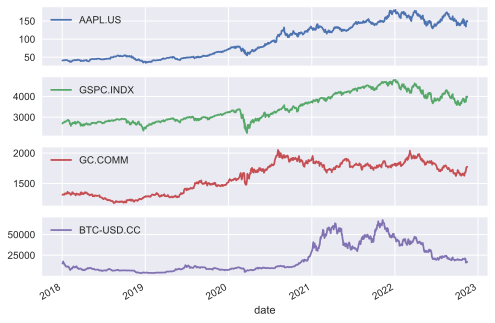

In [5]:
data.plot(subplots=True);

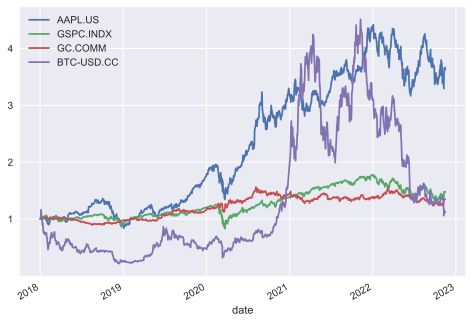

In [6]:
(data / data.iloc[0]).plot();

In [ ]:
# data.to_csv('universe.csv')

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="30%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>